In [43]:
import numpy as np
import scipy as scipy
import math as math
from scipy.optimize import root
from lib3 import *

## Q1

### a)

In [44]:
# Read the matrix A from the file
A, B = fileread('matrices1.txt', 4)

print("Matrix A:")
print(A)

print("initial guess:")
print(B)

eigval, eigvec,steps = power_method(A, x0)

print("Largest Eigenvalue: ", np.round(eigval, 4))
print("Number of steps: ", steps)

Matrix A:
[[ 4.        0.666667 -1.333333  1.333333]
 [ 0.666667  4.        0.        0.      ]
 [-1.333333  0.        6.        2.      ]
 [ 1.333333  0.        2.        6.      ]]
initial guess:
[1. 1. 1. 1.]
Largest Eigenvalue:  8.0
Number of steps:  25


### b)

In [45]:
eigval,steps = QR(A)
print("Eigenvalues using QR method: ", eigval)
print("Number of steps: ", steps)

Eigenvalues using QR method:  [5.99999967 4.         8.         2.00000033]
Number of steps:  21


## Q2

In [46]:
data = read_file("data.txt")
data = np.array(data[0])

xlist = data[:, 0]
ylist = data[:, 1]

The coefficients for the fitted polynomial of degree 3 are tabulated as follows:
+-------------+----------+
| Coefficient |  Value   |
+-------------+----------+
|      a0     |  0.5747  |
|      a1     |  4.7259  |
|      a2     | -11.1282 |
|      a3     |  7.6687  |
+-------------+----------+


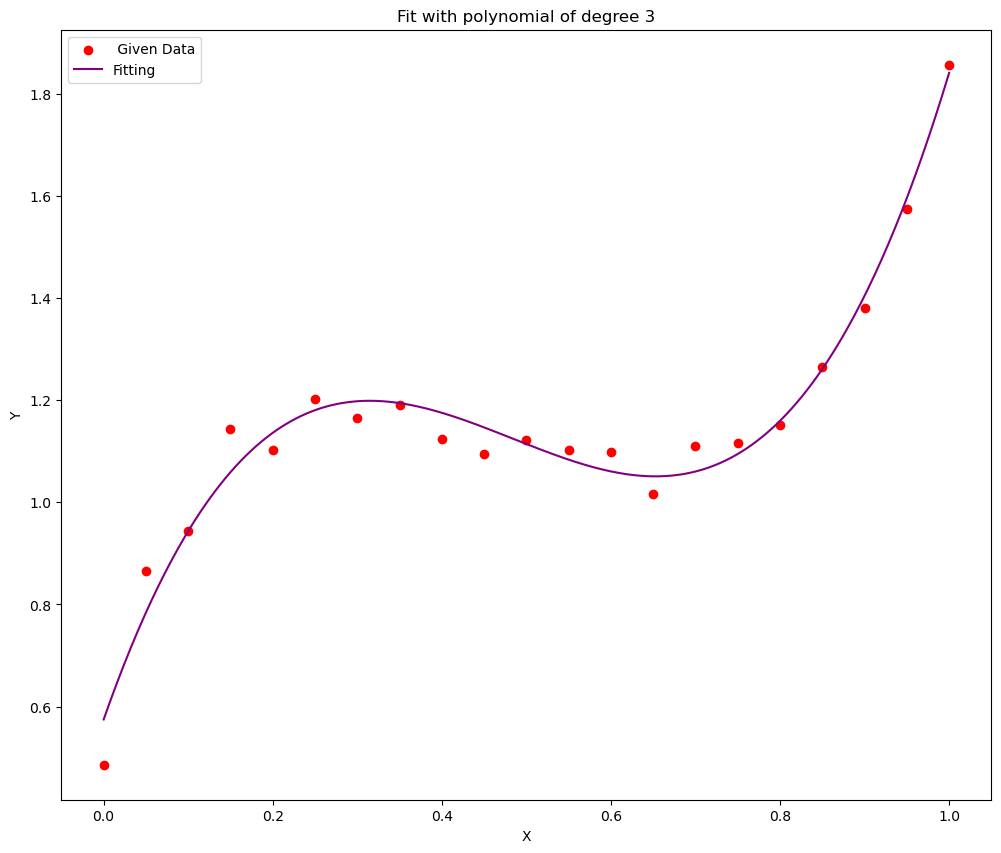

In [47]:
sigma = np.ones(len(xlist))
coeff_list,A_poly = polynomial_fit(np.copy(xlist), np.copy(ylist), np.copy(sigma), 3)


from prettytable import PrettyTable
print("The coefficients for the fitted polynomial of degree 3 are tabulated as follows:")
p=PrettyTable()
table = PrettyTable()
table.field_names = ['Coefficient', 'Value']
for i, coeff in enumerate(coeff_list):
    table.add_row([f'a{i}', np.round(coeff,4)])
print(table) 


import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(xlist, ylist, label=' Given Data', color='red')

xnew = np.linspace(min(xlist), max(xlist), 500)
ynew = poly_fn(xnew, coeff_list)

plt.plot(xnew, ynew, label='Fitting', color='purple')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fit with polynomial of degree 3')
plt.legend()
plt.show()

The coefficients for the fitting with chebyshev polynomial of degree 3:
+-------------+--------+
| Coefficient | Value  |
+-------------+--------+
|      a0     | 1.161  |
|      a1     | 0.3935 |
|      a2     | 0.0468 |
|      a3     | 0.2396 |
+-------------+--------+


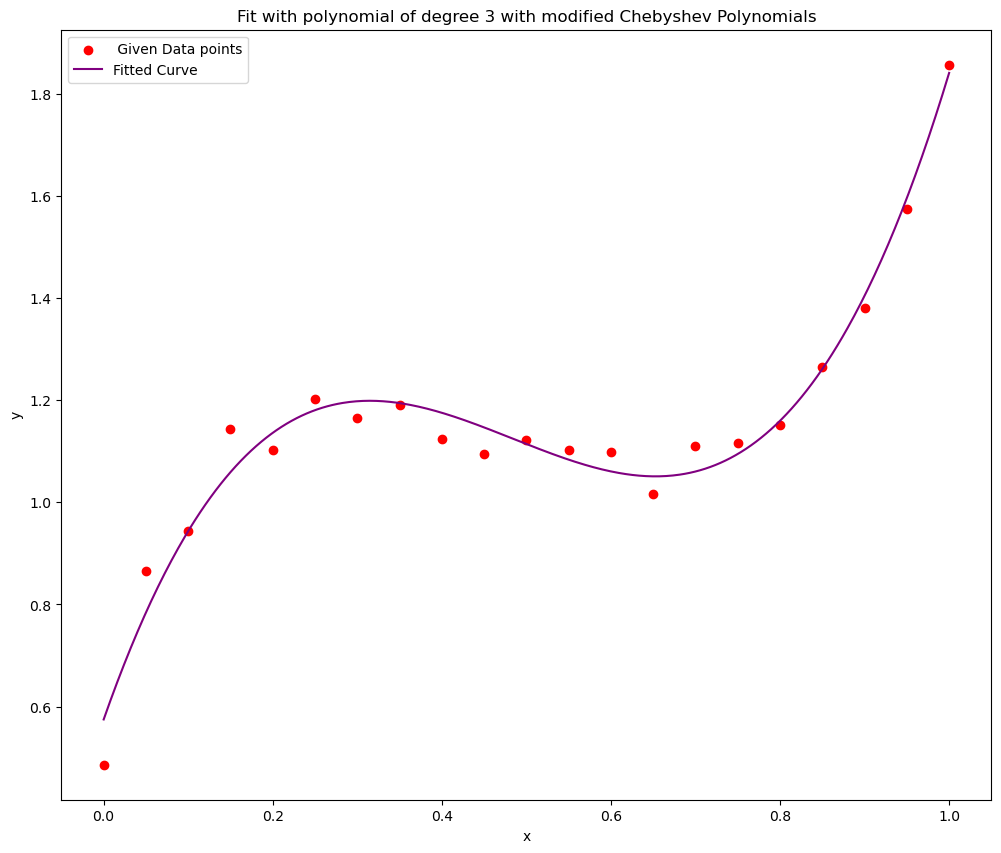

In [48]:
coeff_list_mod,A_mod = polynomial_fit_mod_chebyshev(np.copy(xlist), np.copy(ylist), np.copy(sigma),3)


print("The coefficients for the fitting with chebyshev polynomial of degree 3:")
p=PrettyTable()
table = PrettyTable()
table.field_names = ['Coefficient', 'Value']
for i, coeff in enumerate(coeff_list_mod):
    table.add_row([f'a{i}', np.round(coeff,4)])
print(table)


plt.figure(figsize=(12,10))
plt.scatter(xlist, ylist, label=' Given Data points', color='red')
xlist_new = np.linspace(min(xlist), max(xlist), 500)
ylist_new = [poly_fn_mod(x,coeff_list_mod) for x in xlist_new]
plt.plot(xlist_new, ylist_new, label='Fitted Curve', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fit with polynomial of degree 3 with modified Chebyshev Polynomials')
plt.legend()
plt.show()

In [49]:
CN_poly = np.linalg.cond(A_poly)
CN_mod = np.linalg.cond(A_mod)

p = PrettyTable()
p.field_names = ['Basis', 'Condition Number']
p.add_row(['normal Polynomial fit', CN_poly])
p.add_row(['modified chebyshev Polynomial fit', CN_mod])

print(p)

+-----------------------------------+--------------------+
|               Basis               |  Condition Number  |
+-----------------------------------+--------------------+
|       normal Polynomial fit       | 12104.94867103504  |
| modified chebyshev Polynomial fit | 3.8561465786155766 |
+-----------------------------------+--------------------+
